In [1]:
import numpy as np
import os
import glob
from PIL import Image
from resizeimage import resizeimage
from sklearn.utils import shuffle
import pandas as pd
from scipy import ndimage, misc

In [2]:
dir = os.listdir('/Users/dwei/Desktop/chest_xray/train')
print(dir)

['PNEUMONIA', 'NORMAL']


In [3]:
X_train_normal = []
for i in os.listdir('/Users/dwei/Desktop/chest_xray/train/NORMAL'):
    img = resizeimage.resize_cover(Image.open('/Users/dwei/Desktop/chest_xray/train/NORMAL/{}'.format(i)), [700, 700])
    X_train_normal.append(np.array(img))
Y_train_normal = [0]*len(X_train_normal)
print(len(X_train_normal))

X_train_pneumonia = []
for i in os.listdir('/Users/dwei/Desktop/chest_xray/train/PNEUMONIA'):
    image = Image.open('/Users/dwei/Desktop/chest_xray/train/PNEUMONIA/{}'.format(i))
    if image.size[0] >=700 and image.size[1] >= 700:
        img = resizeimage.resize_cover(image, [700, 700])
        X_train_pneumonia.append(np.array(img))
Y_train_pneumonia = [1]*len(X_train_pneumonia)
print(len(X_train_pneumonia))

1341
2497


In [4]:
Y_train = Y_train_normal + Y_train_pneumonia
print(len(Y_train))
X_train = X_train_normal + X_train_pneumonia
print(len(X_train))
X_train, Y_train = shuffle(X_train, Y_train, random_state=0)

3838
3838


In [5]:
len(Y_train)

3838

In [6]:
len(X_train)

3838

In [7]:
X_train[0].shape

(700, 700)

In [8]:
X_train[1].shape

(700, 700)

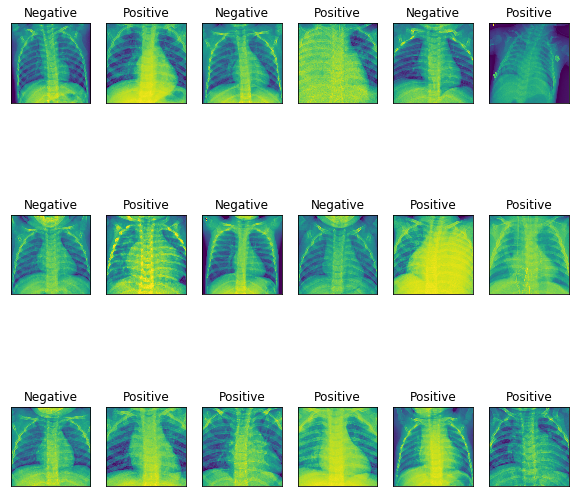

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
class_labels = ['Negative', 'Positive']
plt.figure(figsize=(10,10))
for i in range(18):
    plt.subplot(3,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.title(class_labels[Y_train[i]])
    plt.imshow(X_train[i])

In [10]:
df = pd.read_csv('/Users/dwei/Desktop/562468_1022626_bundle_archive/Chest_xray_Corona_Metadata.csv',sep=r'\s*,\s*',engine = 'python', na_values = '?')
metadata =df.values
repo = "/Users/dwei/Desktop/562468_1022626_bundle_archive/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/"

Covid_train = []
Y_Covid_train = []

for i in metadata:
    if(i[3] == "TEST"):
        break
    image = Image.open(repo+i[1])
    if image.size[0] >=700 and image.size[1] >= 700:
        img = resizeimage.resize_cover(image, [700, 700])
        Covid_train.append(np.array(img)) 
        x = 0 if i[2]=="Normal" else 1
        Y_Covid_train.append(x)
        

In [11]:
len(Covid_train)

3888

In [12]:
len(Y_Covid_train)

3888

In [13]:
Covid_train[0].shape

(700, 700)

In [14]:
Covid_train[1].shape

(700, 700)

In [15]:
Covid_train[2].shape

(700, 700)

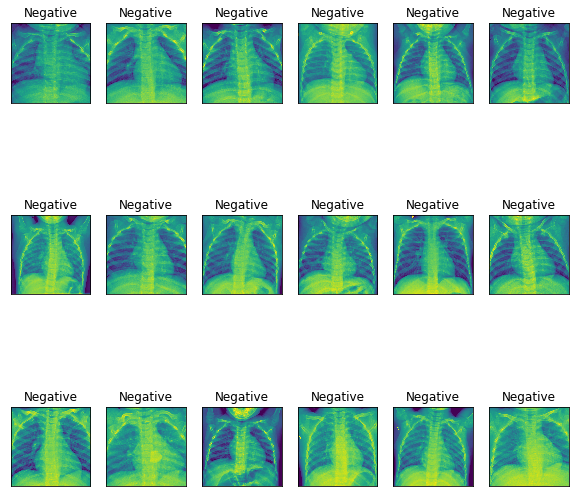

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(18):
    plt.subplot(3,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(class_labels[Y_Covid_train[i]])
    plt.imshow(Covid_train[i])

In [17]:
X_train = X_train + Covid_train
Y_train = Y_train + Y_Covid_train
X_train, Y_train = shuffle(X_train, Y_train, random_state=0)

In [18]:
for i in range(len(X_train)):
    if len(X_train[i].shape) != 2:
        X_train[i] = X_train[i][:,:,0]
X_train = np.array(X_train)

In [19]:
def normalize_data(data): 
    data = data / data.max()
    return data

X_train = normalize_data(X_train)
print('Image dataset have shape =', X_train.shape)

Image dataset have shape = (7726, 700, 700)


AttributeError: 'list' object has no attribute 'shape'

In [20]:
Y_train = np.array(Y_train)
print('Train label has shape =', Y_train.shape)

Train label has shape = (7726,)


ValueError: input array should be at least two-dimensional

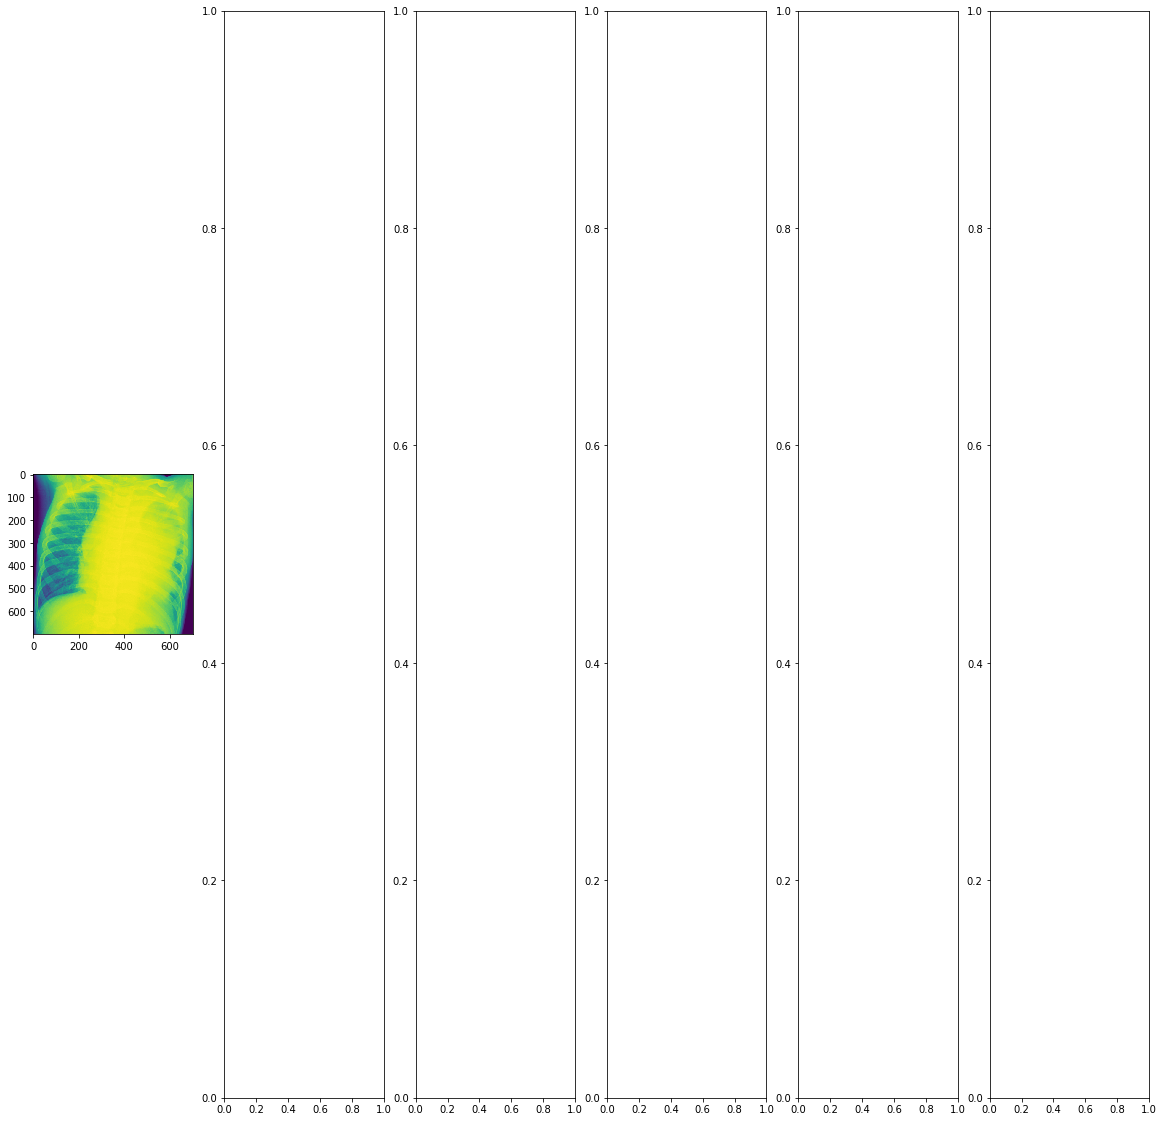

In [22]:
def transpose_2D(X):
    toReturn = np.zeros((X.shape[0], X.shape[1]))
    for i in range(X.shape[1]):
        temp = X[:,i].T
        toReturn[:,i] = temp
    return toReturn

def inverse_2D(X):
    toReturn = np.zeros((X.shape[0], X.shape[1]))
    for i in range(X.shape[1]):
        temp = np.linalg.inv(X[:,i])
        toReturn[:,i] = temp
    return toReturn

def rotate_in_2D(X):
    toReturn = np.zeros((X.shape[0], X.shape[1]))
    for i in range(X.shape[1]):
        temp = ndimage.zoom(X[:,i], 1.5)
        temp = ndimage.rotate(temp, 30, reshape=False)
        length = temp.shape[0]
        temp = temp[15:65, 15:65]
        toReturn[:,i] = temp
    return toReturn

fig,axs = plt.subplots(1,6, figsize=(20,20))
n = np.random.randint(0,X_train.shape[0]-2)
transpose_3D(X_train[n])
axs[0].imshow(X_train[n])
axs[1].imshow(rotate_in_3D(X_train[n]))
axs[2].imshow(np.rot90(rotate_in_3D(X_train[n]), 2))
axs[3].imshow(np.rot90(X_train[n], 3))
axs[4].imshow(transpose_3D(X_train[n]))
axs[5].imshow(np.rot90(transpose_3D(X_train[n]), 1))